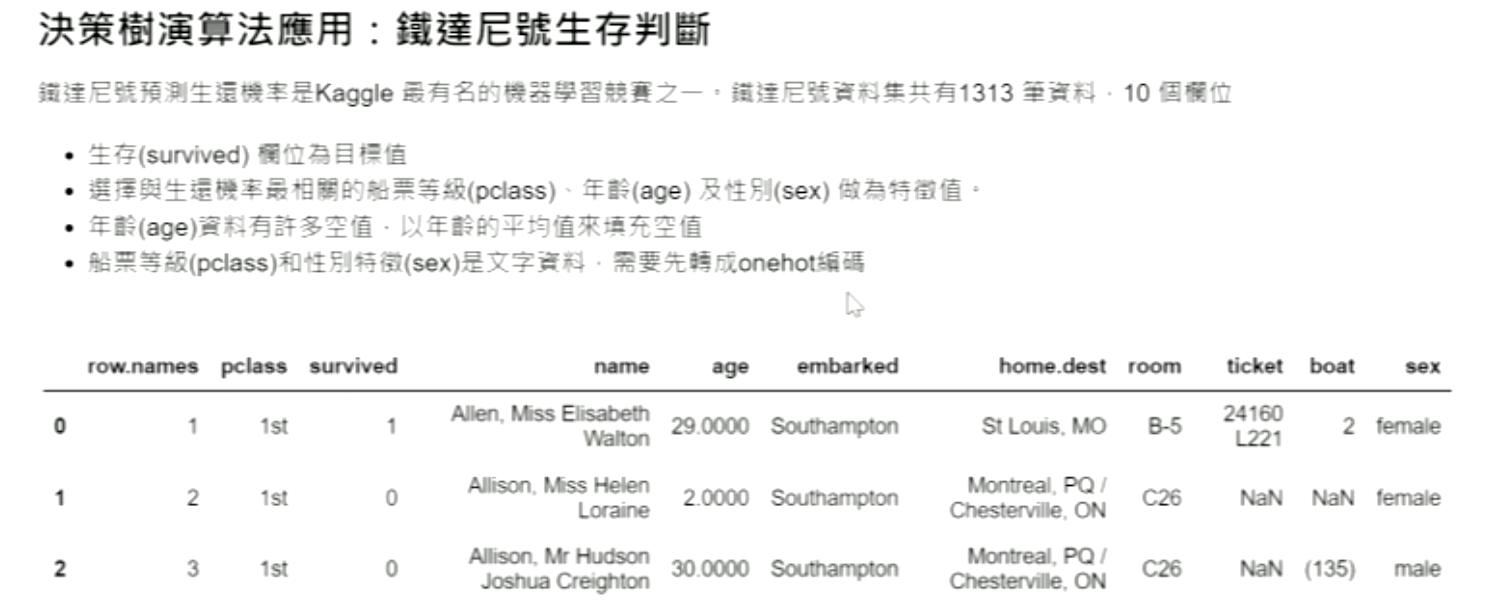

In [4]:
from sklearn.tree  import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer 
import pandas as pd

df=pd.read_csv("./ML_data/titanic.csv")

In [7]:
df.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [6]:
df.isnull().sum()

row.names       0
pclass          0
survived        0
name            0
age           680
embarked      492
home.dest     559
room         1236
ticket       1244
boat          966
sex             0
dtype: int64

In [10]:
x=df[["pclass","age","sex"]]
y=df["survived"]
#將age空值，補入平均值
x["age"].fillna(x['age'].mean(),inplace=True)
x_train, x_test, y_train, y_test=train_test_split(x,y ,test_size=0.2)

dict=DictVectorizer(sparse=False)
#資料集轉為字典
x_train= x_train.to_dict(orient='records')
#資料集從字串轉為數值
x_train= dict.fit_transform(x_train)
x_test= x_test.to_dict(orient='records')
x_test= dict.fit_transform(x_test)

print("onehot 特徵名稱",dict.get_feature_names_out())


onehot 特徵名稱 ['age' 'pclass=1st' 'pclass=2nd' 'pclass=3rd' 'sex=female' 'sex=male']


In [14]:
decision_tree_clf=DecisionTreeClassifier()
decision_tree_clf.fit(x_train,y_train)
score=decision_tree_clf.score(x_test, y_test)
print("鐵達尼號生存率預測：",score)




鐵達尼號生存率預測： 0.7870722433460076
